In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
x = pd.read_csv("BC_Xtrain.csv").drop(columns=["Unnamed: 0"])
y = pd.read_csv("BC_ytrain.csv").drop(columns=["Unnamed: 0"])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='full').fit(x)

Text(0.5, 1.0, 'Breast Cancer PCA')

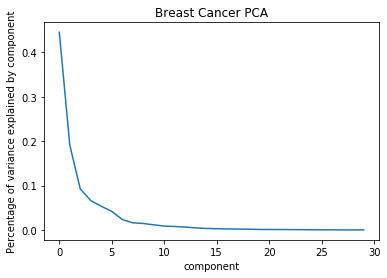

In [3]:
plt.plot(pca.explained_variance_ratio_)
plt.ylabel("Percentage of variance explained by component")
plt.xlabel("component")
plt.title("Breast Cancer PCA")

In [4]:
pca = PCA(n_components=10, svd_solver='full').fit(x)
x1 = pca.transform(x)

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(x1)

In [6]:
print("Number of interations: ", kmeans.n_iter_)

Number of interations:  4


In [7]:
labels = pd.Series(data=kmeans.labels_)
result = pd.concat([labels, y], axis=1)
result.columns=["cluster","diagnosis"]
print("total: %d Ms, %d Bs" %(len(result.loc[result.diagnosis==1]),
                              len(result.loc[result.diagnosis==0])))

total: 158 Ms, 268 Bs


In [12]:
combined = pd.concat([pd.Series(data=x1[:,0]), 
                      pd.Series(data=x1[:,1]),
                      result], axis=1)
combined1 = []
combined1.append(combined.loc[combined.cluster==0].loc[combined.diagnosis==0])
combined1.append(combined.loc[combined.cluster==0].loc[combined.diagnosis==1])
combined1.append(combined.loc[combined.cluster==1].loc[combined.diagnosis==0])
combined1.append(combined.loc[combined.cluster==1].loc[combined.diagnosis==1])

Text(0.5, 1.0, 'PCA')

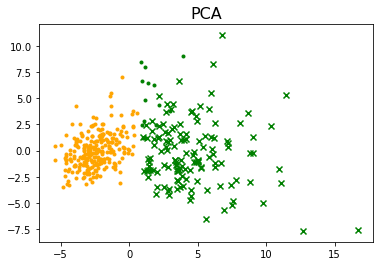

In [16]:
colors = ["green", "green", "orange", "orange"]
markers = [".","x",".","x"]
for i in range(3):
    plt.scatter(combined1[i][0], combined1[i][1], color=colors[i], marker=markers[i])
plt.title("PCA", fontsize=16)

Text(0.5, 1.0, 'Breast Cancer, total')

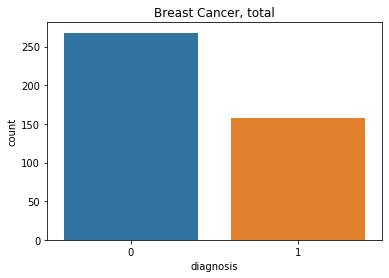

In [8]:
sns.countplot(data=result, x="diagnosis").set_title("Breast Cancer, total")

In [9]:
cluster0 = result.loc[result.cluster==0]
cluster1 = result.loc[result.cluster==1]

In [10]:
print("cluster0: %d Ms, %d Bs" %(len(cluster0.loc[cluster0.diagnosis==1]),
                                 len(cluster0.loc[cluster0.diagnosis==0])))

cluster0: 132 Ms, 14 Bs


Text(0.5, 1.0, 'Breast Cancer, K-means, cluster 0')

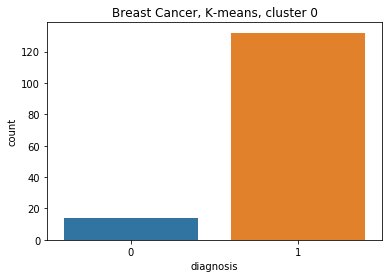

In [11]:
sns.countplot(data=cluster0, x="diagnosis").set_title("Breast Cancer, K-means, cluster 0")

In [12]:
print("cluster1: %d Ms, %d Bs" %(len(cluster1.loc[cluster1.diagnosis==1]),
                                 len(cluster1.loc[cluster1.diagnosis==0])))

cluster1: 26 Ms, 254 Bs


Text(0.5, 1.0, 'Breast Cancer, K-means, cluster 1')

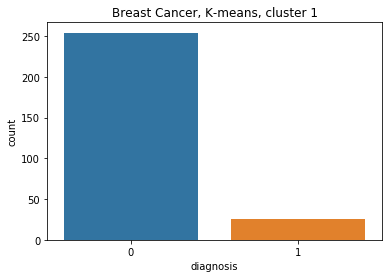

In [13]:
sns.countplot(data=cluster1, x="diagnosis").set_title("Breast Cancer, K-means, cluster 1")

In [14]:
from sklearn.mixture import GaussianMixture
EM = GaussianMixture(n_components=2, n_init=10).fit_predict(x1)

In [15]:
EMlabels = pd.Series(data=EM)
EMresult = pd.concat([EMlabels, y], axis=1)
EMresult.columns=["cluster","diagnosis"]
EMcluster0 = EMresult.loc[EMresult.cluster==0]
EMcluster1 = EMresult.loc[EMresult.cluster==1]

In [16]:
print("cluster0: %d Ms, %d Bs" %(len(EMcluster0.loc[EMcluster0.diagnosis==1]),
                                 len(EMcluster0.loc[EMcluster0.diagnosis==0])))

cluster0: 50 Ms, 231 Bs


Text(0.5, 1.0, 'Breast Cancer, EM, cluster 0')

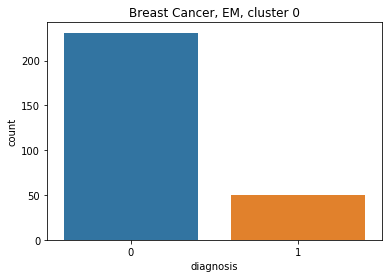

In [17]:
sns.countplot(data=EMcluster0, x="diagnosis").set_title("Breast Cancer, EM, cluster 0")

In [18]:
print("cluster1: %d Ms, %d Bs" %(len(EMcluster1.loc[EMcluster1.diagnosis==1]),
                                 len(EMcluster1.loc[EMcluster1.diagnosis==0])))

cluster1: 108 Ms, 37 Bs


Text(0.5, 1.0, 'Breast Cancer, EM, cluster 1')

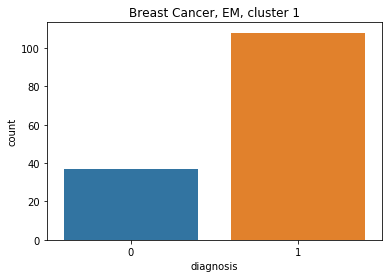

In [19]:
sns.countplot(data=EMcluster1, x="diagnosis").set_title("Breast Cancer, EM, cluster 1")

Text(0.5, -0.05, 'Figure 5. Breast Cancer Dataset with PCA')

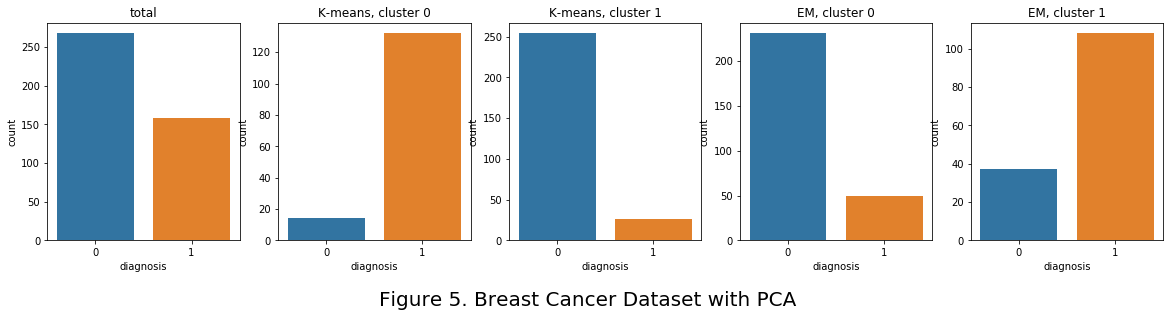

In [20]:
fig, axs = plt.subplots(1,5,figsize=(20,4))
sns.countplot(data=result, x="diagnosis", ax=axs[0]).set_title("total")
sns.countplot(data=cluster0, x="diagnosis", ax=axs[1]).set_title("K-means, cluster 0")
sns.countplot(data=cluster1, x="diagnosis", ax=axs[2]).set_title("K-means, cluster 1")
sns.countplot(data=EMcluster0, x="diagnosis", ax=axs[3]).set_title("EM, cluster 0")
sns.countplot(data=EMcluster1, x="diagnosis", ax=axs[4]).set_title("EM, cluster 1")
fig.suptitle("Figure 5. Breast Cancer Dataset with PCA", fontsize=20,y=-0.05)

In [21]:
###########ANN
x_train = pd.read_csv("BC_Xtrain.csv").drop(columns=["Unnamed: 0"])
y_train = pd.read_csv("BC_ytrain.csv").drop(columns=["Unnamed: 0"])
x_test = pd.read_csv("BC_Xtest.csv").drop(columns=["Unnamed: 0"])
y_test = pd.read_csv("BC_ytest.csv").drop(columns=["Unnamed: 0"])
y_train = y_train.to_numpy().flatten()
y_test = y_test.to_numpy().flatten()

In [22]:
pca = PCA(n_components=10, svd_solver='full').fit(x_train)
x_train1 = pca.transform(x_train)
x_test1 = pca.transform(x_test)

In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time
#train on original dataset
clf = MLPClassifier(max_iter=10000, activation='logistic', hidden_layer_sizes=10)
t = time.time()
clf.fit(x_train, y_train)
t = (time.time()- t) * 1000
train_acc = accuracy_score(y_train, clf.predict(x_train))
test_acc = accuracy_score(y_test,clf.predict(x_test))
print("Original: time %dms, train accuracy %.4f, test accuracy %.4f"%(t, train_acc, test_acc))

Original: time 492ms, train accuracy 0.9859, test accuracy 0.9860


In [24]:
#train on transformed dataset
t = time.time()
clf.fit(x_train1, y_train)
t = (time.time()- t) * 1000
train_acc = accuracy_score(y_train, clf.predict(x_train1))
test_acc = accuracy_score(y_test,clf.predict(x_test1))
print("PCA: time %dms, train accuracy %.4f, test accuracy %.4f"%(t, train_acc, test_acc))

PCA: time 539ms, train accuracy 0.9836, test accuracy 0.9860
